# The zoologist

The zoologist is an expert at recognizing penguin species. Here are 3 species of penguin that our specialist is able to name:

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/palmer-penguins.png" width=1000>

Are you able to differentiate them?

## The task

As we know nothing about penguins, let's use a Machine Learning algorithm to help us classify these penguins based on their characteristics.

## Load the dataset

Let's load the seaborn's [Penguins dataset](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) and store it in a DataFrame getting rid of the `nans` to make things easy! You should get:

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/penguin-df.png' width=600>

In [8]:
import pandas as pd
import seaborn as sns

In [27]:
penguins_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
penguins_df.head()

penguins_df.dropna(inplace=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


❓What are the characteristics of the penguins

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/gentoo.png' width=700>

❓How many species of penguin are there in this dataset?

In [6]:
penguins_df.species.nunique()

3

❓How many observations for each species are there in the dataset?

In [7]:
penguins_df.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

## Data visualization

Plot the `'bill_length_mm'` against the `'bill_depth_mm'` with a different color for each species:

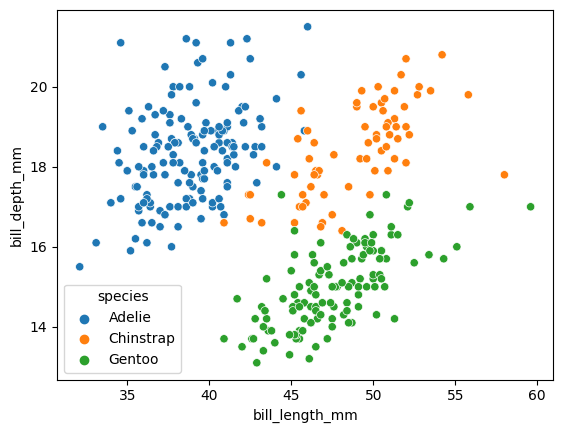

In [11]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_df, hue='species');

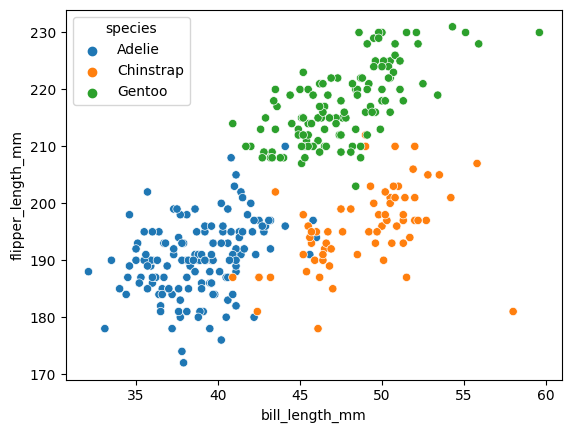

In [52]:
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', data=penguins_df, hue='species');

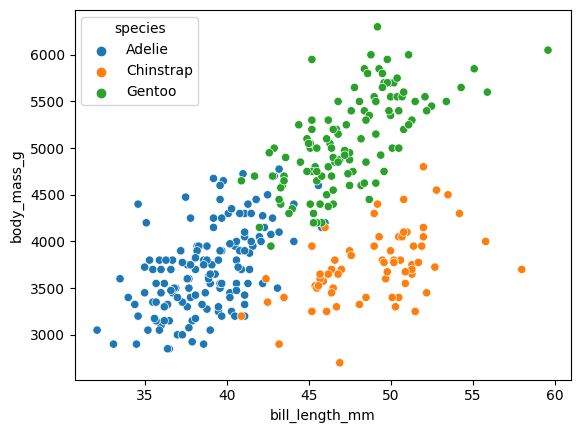

In [51]:
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=penguins_df, hue='species');

❓Are you able to differentiate these species based on your observations?

The **gentoo** species seems to have clearly longer flippers than the other 2 species.

## Modeling

There are two strategies to tackle the multiclass problem:

- One vs One
- One vs All (One vs Rest)

### One vs One
- Train **a model for each pair of classes** within the dataset
- At prediction time, the class which received the most votes is selected

<img src='images/ovo_multiclass.png' width=500 style='margin:auto'> 


👍Considers pair-specific differences


👎Creates a large number of sub models. Computationally expensive


### One vs Rest (One vs All)

- Train **one model per class** against all others combined
- At prediction time, the class with the highest probability is selected

<img src='images/ova_multiclass.png' width=500 style='margin:auto'> 

👍Less computationally expensive


👎Loses pair-specific differences that get diluted in a combination of classes


## One Vs Rest

👇 Evaluate a model that predicts the penguin species according to it **numerical** features. Implement a One vs Rest multiclass strategy by tweaking the right parameter of `LogisticRegression`. Evaluate it by cross-validation and record the time it takes to do so.

In [15]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_df[features]
y = penguins_df.species

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold

ovr_model = LogisticRegression(multi_class='ovr', max_iter=1000)

ovr_cv_results = cross_validate(ovr_model, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
ovr_cv_results['test_score'].mean()

0.991044776119403

In [47]:
print(f"total time: {ovr_cv_results['fit_time'].sum() + ovr_cv_results['score_time'].sum():.2f}s")

total time: 0.22s


## One Vs One

👇 This time, implement a `OneVsOneClassifier`. There is no parameter to directly specify a OvO multiclass strategy in `LogisticRegression`. You'll need to find an alternative way to do so 😉

Again, Evaluate by cross-validation and record the time it takes to do so.

In [49]:
from sklearn.multiclass import OneVsOneClassifier

estimator = LogisticRegression(max_iter=1000)
ovo_model = OneVsOneClassifier(estimator)

ovo_cv_results = cross_validate(ovo_model, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
ovo_cv_results['test_score'].mean()

0.9819990954319312

In [50]:
print(f"total time: {ovo_cv_results['fit_time'].sum() + ovo_cv_results['score_time'].sum():.2f}s")

total time: 0.19s


ℹ️ We notice that both models have very similar accuracies. Why? <br> <br>First, both models are doing a very good job on a dataset that is reasonably easy to classify! Secondly, in the instance of having just three classes to distinguish between, both OvO models and OvR models actually result in 3 sub-models being fitted! Thus we would expect to give very similar accuracy. 

❓The zoologist is able to find the right species 9 times over 10, can you beat him?

<details>
<summary> 👉Solution </summary>
You should get a mean accuracy of around 98% which is more than 90%. So our algorithm beats the zoologist!

</details>

# 🏁 